# Case Ifood
*Desenvolvido por Mário de Deus*

# Installs

# Imports

In [8]:
# 1. Instalação (caso não tenha)
!pip install pycaret

In [10]:
import numpy as np
import pandas as pd
import joblib
# import seaborn as sns
# import shap

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'distutils'

# Descrição / Objetivo do problema

* O objetivo

O objetivo da equipe é construir um modelo preditivo que produzirá o maior lucro para a próxima campanha de marketing direto, programada para o próximo mês. A nova campanha, sexta, visa a venda de um novo gadget para clientes cadastrados no Banco de Dados da empresa. Para construir o modelo, foi realizada uma campanha piloto envolvendo 2.240 clientes. Os clientes foram selecionados aleatoriamente e contatados por telefone para a aquisição do gadget. Durante os meses seguintes, os clientes que compraram a oferta foram devidamente etiquetados. O custo total da campanha da amostra foi de 6,720MU e a receita gerada pelos clientes que aceitaram a oferta foi de 3,674MU. Globalmente, a campanha teve um lucro de -3,046MU. A taxa de sucesso da campanha foi de 15%. O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes. Felizmente, o modelo permitirá que a empresa escolha a dedo os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em estudar as características dos clientes que desejam comprar o gadget.
Os dados
O conjunto de dados contém características sociodemográficas e firográficas de cerca de 2.240 clientes contatados. Além disso, contém um sinalizador para aqueles clientes que responderam à campanha, comprando o produto.


# Data Loading

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Google COlab
# df = pd.read_csv('/content/drive/MyDrive/Front End e Mobile Development/2024/20240318 - Aula06/data.csv',encoding='utf-8')

#Jupyter
df = pd.read_csv('data.csv',encoding='utf-8')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

Drop da feature ID por ser um identificador

In [ ]:
df.drop('ID',axis = 1, inplace = True, errors = 'ignore')
df.shape

(2240, 28)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [ ]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp2              2
AcceptedCmp1              2
Complain                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
dtype: int64

In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace = True, errors = 'ignore')

## NaN analysis

In [ ]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Somente a feature Income possui valores nulos.
Analisando as linhas com valores nulos em relação aos valores da feature target

In [ ]:
#Distribuição da feature Response entre as amostras com Income = NaN
df[df.Income.isna()].Response.value_counts()

0    23
1     1
Name: Response, dtype: int64

In [ ]:
# Proporção de 0 e 1 da feature Response no df completo
df.Response.value_counts(normalize = True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [ ]:
print('% amostras com NaN: ',np.round((df.Income.isna().sum()/len(df))*100,2))
print('% amostras com NaN e Response = 1: ',
      np.round((( len(df[(df.Income.isna()) & (df.Response == 1)]) / len(df))*100),2))

% amostras com NaN:  1.07
% amostras com NaN e Response = 1:  0.04


Dado que as 24 linhas com valores Nan representam 1% do dataset total, e que entre as 24 linhas com Income == Nan somente uma apresentou Response == 1 (0.04%), as 24 linhas serão dropadas

In [ ]:
print('Shape antes do dropna: ',df.shape[0])
df.dropna(axis=0,inplace = True)
print('Shape após o dropna: ',df.shape[0])

Shape antes do dropna:  2240
Shape após o dropna:  2216


## Ajuste do dtypes

In [ ]:
df = df.convert_dtypes()
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.Response = df.Response.astype('bool')
df.dtypes

Year_Birth                      Int64
Education                      string
Marital_Status                 string
Income                          Int64
Kidhome                         Int64
Teenhome                        Int64
Dt_Customer            datetime64[ns]
Recency                         Int64
MntWines                        Int64
MntFruits                       Int64
MntMeatProducts                 Int64
MntFishProducts                 Int64
MntSweetProducts                Int64
MntGoldProds                    Int64
NumDealsPurchases               Int64
NumWebPurchases                 Int64
NumCatalogPurchases             Int64
NumStorePurchases               Int64
NumWebVisitsMonth               Int64
AcceptedCmp3                    Int64
AcceptedCmp4                    Int64
AcceptedCmp5                    Int64
AcceptedCmp1                    Int64
AcceptedCmp2                    Int64
Complain                        Int64
Response                         bool
dtype: objec

# Feature Engineering

## Idade dos clientes

In [ ]:
from datetime import datetime
ano_atual = pd.datetime.now().year
df['Age'] = ano_atual - df.Year_Birth
df.drop('Year_Birth',axis = 1, errors = 'ignore', inplace = True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,True,68
1,Graduation,Single,46344,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,False,71
2,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,False,60
3,Graduation,Together,26646,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,False,41
4,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,False,44


## Tempo como cliente

In [ ]:
dt = pd.datetime.now().date()
df['Time_Customer'] = dt - pd.to_datetime(df['Dt_Customer']).dt.date
df['Time_Customer'] = df['Time_Customer'] / np.timedelta64(1, 'Y')
print(df[['Dt_Customer','Time_Customer']].head())
df.drop('Dt_Customer',axis = 1, inplace = True)

  Dt_Customer  Time_Customer
0  2012-09-04      12.583421
1  2014-03-08      11.077572
2  2013-08-21      11.622415
3  2014-02-10      11.148757
4  2014-01-19      11.208991


### Removendo valores incoerentes com a variável Marital_Status

In [ ]:
index_to_drop = df[(df['Marital_Status'] =='YOLO') | (df['Marital_Status'] =='Absurd') | (df['Marital_Status'] =='absurd') | (df['Marital_Status'] == 'Alone')].index
df.drop(index_to_drop,inplace = True)
df = df.reset_index(drop = True)
df.Marital_Status.value_counts()
print(df.shape)

(2209, 26)


In [ ]:
df.rename(columns={'Response':'z_Response'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
df.rename(columns={'z_Response':'Response'},inplace = True)

df.columns

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer', 'Response'],
      dtype='object')

# Preparação do dataset para Modelagem


## Train Test Validation Split

In [ ]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (2099, 26)
Unseen Data For Predictions: (110, 26)


# Auto ML - PYCARET

**Para o problema de negócio em questão, a métrica Precision é a mais relevante.**

In [ ]:
df_train_test.dtypes

AcceptedCmp1             Int64
AcceptedCmp2             Int64
AcceptedCmp3             Int64
AcceptedCmp4             Int64
AcceptedCmp5             Int64
Age                      Int64
Complain                 Int64
Education               string
Income                   Int64
Kidhome                  Int64
Marital_Status          string
MntFishProducts          Int64
MntFruits                Int64
MntGoldProds             Int64
MntMeatProducts          Int64
MntSweetProducts         Int64
MntWines                 Int64
NumCatalogPurchases      Int64
NumDealsPurchases        Int64
NumStorePurchases        Int64
NumWebPurchases          Int64
NumWebVisitsMonth        Int64
Recency                  Int64
Teenhome                 Int64
Time_Customer          float64
Response                  bool
dtype: object

## Setup

In [ ]:
s = setup(data = df_train_test,
          target = 'Response',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['Education', 'Marital_Status'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,Response
2,Target type,Binary
3,Original data shape,"(2099, 26)"
4,Transformed data shape,"(3072, 34)"
5,Transformed train set shape,"(2442, 34)"
6,Transformed test set shape,"(630, 34)"
7,Numeric features,23
8,Categorical features,2
9,Preprocess,True


In [ ]:
# check available models
#has to be called necessary only after having defined a setup.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Comparativo entre Modelos

In [ ]:
# best_model = compare_models(sort = 'auc')

In [ ]:
# print(best_model)

## Análise do Modelo

In [ ]:
#evaluate model
# evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

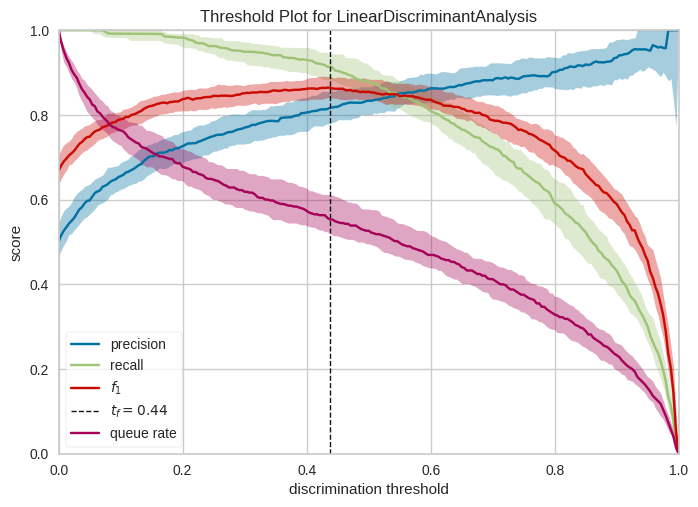

In [ ]:
#plot model - treshold
# plot_model(best_model, plot = 'threshold')

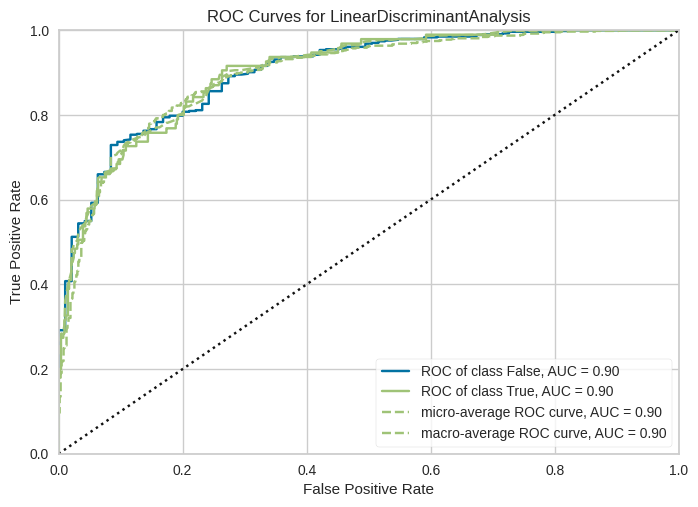

In [ ]:
#plot model - auc
# plot_model(best_model, plot = 'auc')

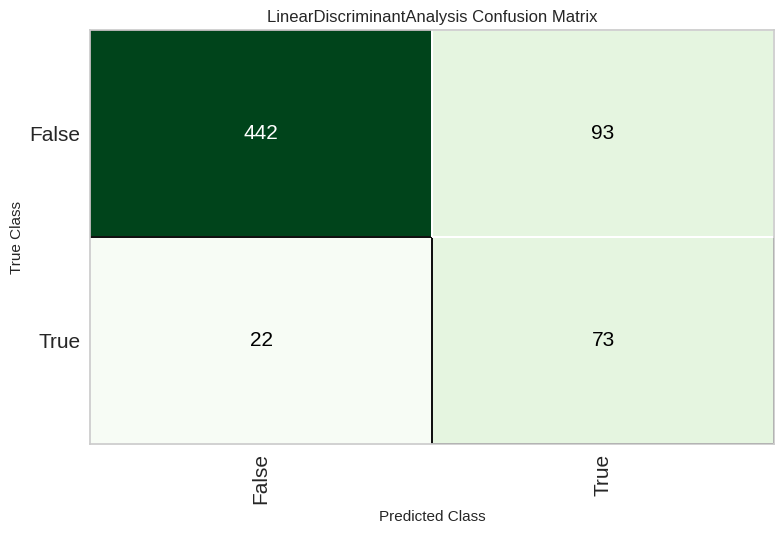

In [ ]:
#plot model - confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

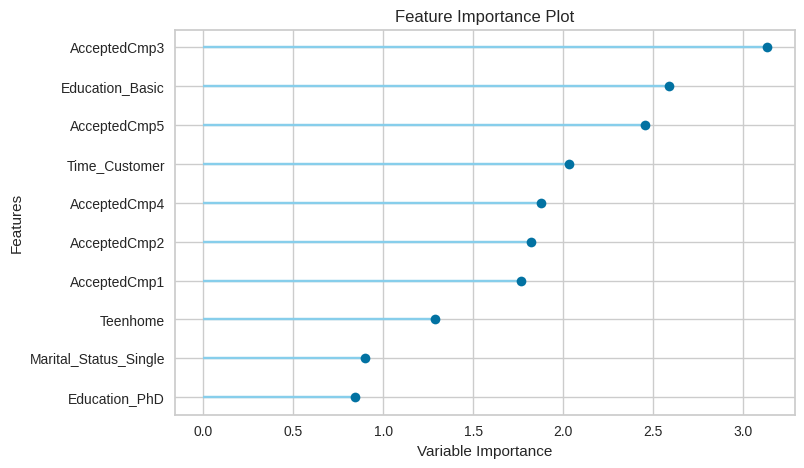

In [ ]:
#plot model - feature
plot_model(best_model, plot = 'feature')

In [ ]:
#predict model - raw score
predict_model(best_model, raw_score= True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8175,0.9017,0.7684,0.4398,0.5594,0.4548,0.4830


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,...,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,67786,0,...,6,3,1,0,0,10.316434,True,1,0.1742,0.8258
1782,0,0,0,0,0,60,0,PhD,31686,1,...,3,1,6,31,1,9.823610,False,0,0.9696,0.0304
1944,0,0,0,0,0,74,0,PhD,59292,0,...,8,3,3,71,1,10.801044,False,0,0.9850,0.0150
1670,0,0,1,0,0,54,0,PhD,38097,1,...,2,3,7,70,1,11.460878,True,1,0.0632,0.9368
1219,0,0,0,0,0,48,0,Master,49681,0,...,7,7,7,66,2,10.406784,False,0,0.9950,0.0050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,37085,1,...,3,3,8,65,1,9.766114,False,0,0.9948,0.0052
1923,1,0,0,0,0,59,0,Graduation,81168,0,...,7,6,3,84,0,9.903009,False,0,0.9498,0.0502
1523,0,0,0,0,0,46,0,2n Cycle,52195,2,...,2,1,8,2,1,9.889320,False,0,0.8468,0.1532
641,0,0,0,0,0,55,0,Graduation,4428,0,...,0,25,1,0,1,10.488922,False,0,0.5627,0.4373


* Outros tipos de plot:
https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

## Criando um Modelo

In [ ]:
#create model rf
mdl_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.8607,0.3182,0.5385,0.4000,0.3250,0.3395
1,0.9252,0.9198,0.6364,0.8235,0.7179,0.6756,0.6831
2,0.8844,0.8593,0.3636,0.7273,0.4848,0.4278,0.4605
3,0.8639,0.8664,0.4545,0.5556,0.5000,0.4222,0.4250
4,0.8776,0.9293,0.3182,0.7000,0.4375,0.3795,0.4168
5,0.8912,0.8369,0.4091,0.7500,0.5294,0.4738,0.5017
6,0.8571,0.8471,0.2727,0.5455,0.3636,0.2931,0.3155
7,0.8639,0.8115,0.2727,0.6000,0.3750,0.3105,0.3411
8,0.9048,0.9059,0.4783,0.8462,0.6111,0.5616,0.5913


## Tuning dos Hiperparâmetros

### RF

In [ ]:
# tuned_rf = tune_model(mdl_rf)

In [ ]:
#predict rf
#mdl_rf com e sem tuning apresentaram AUC e desvio padrao (STD) praticamente iguais.
predict_model(mdl_rf, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8983,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,66,0,PhD,67786,0,Widow,80,82,102,441,20,431,6,1,6,3,1,0,0,11.326721,True,0,0.6000,0.4000
1782,0,0,0,0,0,61,0,PhD,31686,1,Married,0,0,1,5,0,11,0,2,3,1,6,31,1,10.833898,False,0,1.0000,0.0000
1944,0,0,0,0,0,75,0,PhD,59292,0,Together,19,14,14,68,14,378,5,2,8,3,3,71,1,11.811331,False,0,0.9600,0.0400
1670,0,0,1,0,0,55,0,PhD,38097,1,Married,0,2,69,35,1,77,2,4,2,3,7,70,1,12.471167,True,0,0.5383,0.4617
1219,0,0,0,0,0,49,0,Master,49681,0,Married,0,0,21,26,0,411,1,6,7,7,7,66,2,11.417072,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,50,0,Graduation,37085,1,Married,2,1,3,16,0,39,0,4,3,3,8,65,1,10.776402,False,0,0.9950,0.0050
1923,1,0,0,0,0,60,0,Graduation,81168,0,Married,147,0,22,592,22,410,4,1,7,6,3,84,0,10.913298,False,0,0.8667,0.1333
1523,0,0,0,0,0,47,0,2n Cycle,52195,2,Single,0,0,1,4,0,12,0,1,2,1,8,2,1,10.899608,False,0,0.9867,0.0133
641,0,0,0,0,0,56,0,Graduation,4428,0,Married,2,4,321,12,4,16,0,0,0,25,1,0,1,11.499209,False,0,0.8850,0.1150


In [ ]:
print(mdl_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
print(tuned_rf)

In [ ]:
#predict rf
predict_model(tuned_rf, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8746,0.8984,0.3789,0.6429,0.4768,0.4109,0.4295


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response,prediction_label,prediction_score_0,prediction_score_1
1869,0,0,0,0,0,65,0,PhD,67786,0,Widow,80,82,102,441,20,431,6,1,6,3,1,0,0,10.316434,True,0,0.6000,0.4000
1782,0,0,0,0,0,60,0,PhD,31686,1,Married,0,0,1,5,0,11,0,2,3,1,6,31,1,9.823610,False,0,1.0000,0.0000
1944,0,0,0,0,0,74,0,PhD,59292,0,Together,19,14,14,68,14,378,5,2,8,3,3,71,1,10.801044,False,0,0.9600,0.0400
1670,0,0,1,0,0,54,0,PhD,38097,1,Married,0,2,69,35,1,77,2,4,2,3,7,70,1,11.460878,True,0,0.5383,0.4617
1219,0,0,0,0,0,48,0,Master,49681,0,Married,0,0,21,26,0,411,1,6,7,7,7,66,2,10.406784,False,0,0.9800,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0,0,0,0,0,49,0,Graduation,37085,1,Married,2,1,3,16,0,39,0,4,3,3,8,65,1,9.766114,False,0,0.9950,0.0050
1923,1,0,0,0,0,59,0,Graduation,81168,0,Married,147,0,22,592,22,410,4,1,7,6,3,84,0,9.903009,False,0,0.8667,0.1333
1523,0,0,0,0,0,46,0,2n Cycle,52195,2,Single,0,0,1,4,0,12,0,1,2,1,8,2,1,9.889320,False,0,0.9867,0.0133
641,0,0,0,0,0,55,0,Graduation,4428,0,Married,2,4,321,12,4,16,0,0,0,25,1,0,1,10.488922,False,0,0.8750,0.1250


## AUC Plot

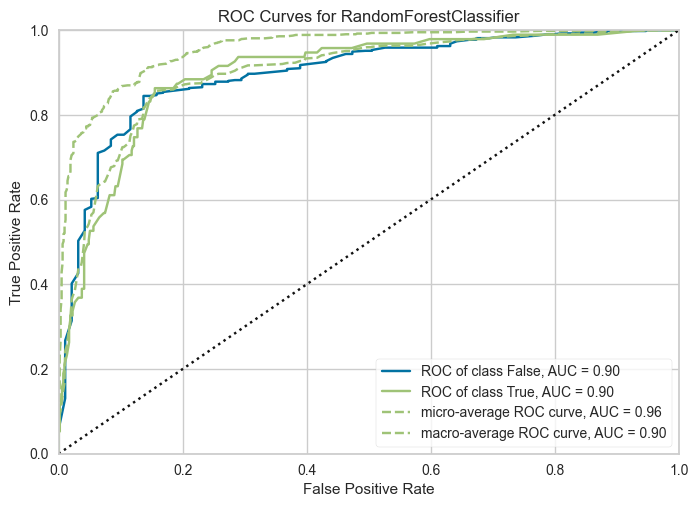

In [ ]:
#auc
plot_model(tuned_rf, plot = 'auc')

## Feature Importance

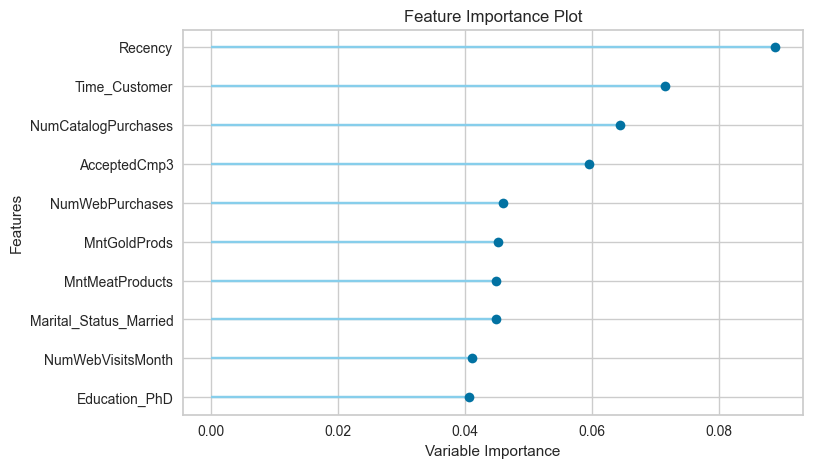

In [ ]:
#feature
plot_model(tuned_rf, plot = 'feature')

## Matriz de Confusão

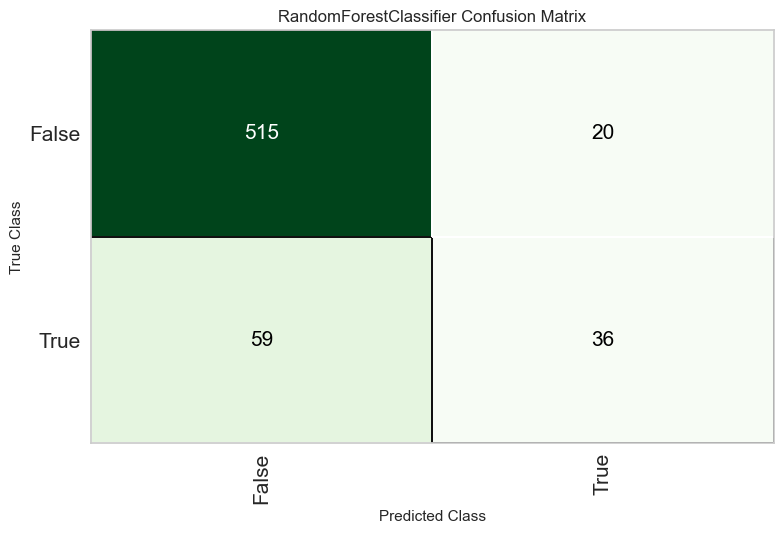

In [ ]:
#confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

## Save Model

In [ ]:
save_model(mdl_rf, './deploy/pickle/pickle_rf_pycaret2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\m4005001\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcceptedCmp1', 'AcceptedCmp2',
                                              'AcceptedCmp3', 'AcceptedCmp4',
                                              'AcceptedCmp5', 'Age', 'Complain',
                                              'Income', 'Kidhome',
                                              'MntFishProducts', 'MntFruits',
                                              'MntGoldProds', 'MntMeatProducts',
                                              'MntSweetProducts', 'MntWin...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=Non

In [ ]:
cols_x_test = get_config(variable="X_test").columns
cols_x_test

Index(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Complain', 'Education', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Teenhome',
       'Time_Customer'],
      dtype='object')

In [ ]:
df_valid.drop('Response', axis = 1).to_csv('Xtest.csv', index = False)

In [ ]:
df_valid

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Complain,Education,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Time_Customer,Response
0,0,0,0,0,0,41,0,Graduation,26646,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,11.148757,False
1,0,0,0,0,0,79,0,Graduation,37760,0,Together,150,5,28,38,12,84,1,2,6,4,7,20,0,12.594372,False
2,0,0,0,0,0,40,0,Master,20559,1,Married,3,1,7,29,0,13,0,2,3,2,8,88,0,12.065956,False
3,0,0,0,0,0,68,0,Graduation,65486,0,Widow,37,19,14,125,67,245,2,1,10,4,2,29,1,10.899608,False
4,0,0,0,0,0,61,0,Master,79143,0,Married,27,37,32,780,167,650,9,1,13,6,3,2,0,12.649130,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,47,0,Basic,26487,1,Single,12,8,23,10,14,2,1,3,3,2,5,23,0,11.877041,False
106,0,0,0,0,0,42,0,Master,89616,0,Single,145,47,15,655,111,671,5,1,12,7,2,36,0,12.107025,True
107,0,0,0,0,0,78,0,Graduation,27469,0,Married,3,1,0,2,2,9,0,1,3,0,6,2,0,12.673772,False
108,0,0,0,0,0,30,0,2n Cycle,80617,0,Single,72,51,32,631,55,594,6,1,8,4,2,42,0,12.479380,False


# Referências:
* https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d
* https://pycaret.gitbook.io/docs/get-started/quickstart#classification
* https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model

# CP 1: 

In [ ]:
# Importa todas as funções necessárias da biblioteca PyCaret para classificação
from pycaret.classification import *

In [ ]:
# 3. Setup
# Inicializa o ambiente do PyCaret com os dados e parâmetros definidos
clf_setup = setup(data=df_processed,              
                  target='Response',              
                  session_id=123,                
                  silent=True,                    
                  use_gpu=False,                 
                  fix_imbalance=True,            
                  normalize=True,                
                  remove_outliers=True,          
                  feature_selection=True,         
                  ignore_features=['Income'],    
                  fold=5,                        
                  log_experiment=True,            
                  experiment_name='ifood_checkpoint_auc',  
                  
                  verbose=False)                  


In [ ]:
# 4. Comparar modelos com base em AUC
best_models = compare_models(sort='AUC', n_select=3)

In [ ]:
# 5. Escolher o melhor modelo e tunar
tuned_model = tune_model(best_models[0], optimize='AUC')


In [ ]:
# 6. Avaliação final
plot_model(tuned_model, plot='auc')
evaluate_model(tuned_model)

In [ ]:
# 7. Previsões (separar um X_test antes, se quiser)
predictions = predict_model(tuned_model)

In [ ]:
# 8. Salvar o modelo (opcional)
save_model(tuned_model, 'ifood_best_model_auc')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# Loop nos modelos
for i, model in enumerate(best_models):
    name = model.__class__.__name__
    
    # Faz predição com score
    preds = predict_model(model)
    
    # Extrai as probabilidades da classe positiva
    fpr, tpr, _ = roc_curve(preds['Response'], preds['Score'])
    roc_auc = auc(fpr, tpr)
    
    # Plota a curva
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Linha base (aleatória)
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Configurações do gráfico
plt.title('Comparação das Curvas ROC (AUC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()